##1. Overview

주제 : 타이타닉호 생존자 예측

----------
데이터 소개 : Titanic - Machine Learning from Disaster

    - training set (train.csv): 12개 feature
    PassengerId: 승객번호
    Survived: 1이면 생존, 0이면 사망
    Pclass: 1등석, 2등석, 3등석
    Name: 이름 
    Sex: 성별(male vs female)
    Age: 나이
    SibSp: 형제/배우자 수
    Parch: 부모/자녀 수
    Ticket: 티켓 번호
    Fare: 요금
    Cabin: 숙소 번호
    Embarked: 탑승지(C,Q,S)

    - test set (test.csv): 11개 feature 
    *Survived 반응 변수 제외
---

## 2. 데이터 불러오기

In [69]:
#기본적인 Library 불러오기
#아래 Library를 처음보신다면 각각 어떤 역할을 하는지 대략적으로 찾아보세요!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# 구글 드라이브를 연동시키는 작업입니다. 데이터를 구글 드라이브에 올려놓고 불러오는 분들만 사용하시면 됩니다!
# 데이터를 불러오는 다른 방법을 사용하셔도 좋아요!

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Pandas 라이브러리로 csv파일 읽어들이기


In [71]:
PATH = "/content/drive/MyDrive/kubig_ML"

df_train = pd.read_csv(PATH+"/titanic_train.csv")

## 3. 데이터 전처리 (feature engineering)


### 데이터 구조 살펴보기

In [72]:
# DataFrame에서 제공하는 Method를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info())

print(df_train.info()) ## 데이터 요약본 (변수명, type 제공)
df_train.head(10) ## 첫 10행 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 데이터 결측치 처리하기

In [73]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치가 있는 Age, Cabin, Embarked 변수를 처리해줘야 합니다.

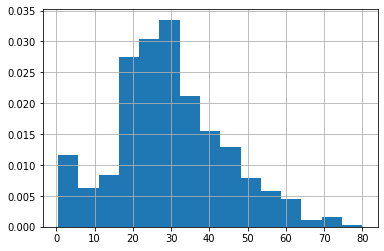

In [74]:
# Age 변수
df_train["Age"].hist(bins=15,density=True,stacked=True)

변수 분포가 치우쳐 있으므로 평균을 결측치 대체로 사용하는 것은 바람직하지 않다. 미디언을 사용하도록 하겠다.

In [75]:
am = df_train["Age"].median()
df_train["Age"] = df_train["Age"].fillna(am)
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin 변수의 경우 모델링에 별로 유용하지 않을 것 같아 결측치 처리과정은 스킵합니다.

마지막으로 Embarked 변수의 경우 결측치가 2개 밖에 없고 범주형 변수이므로 가장 빈도가 높은 하위 항목으로 결측치 처리를 합니다.

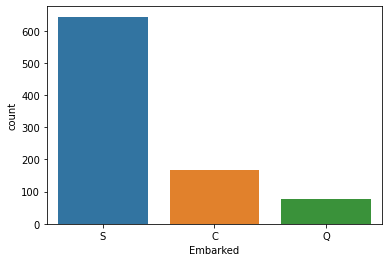

In [76]:
# Embarked 변수 -> 가장 빈도 높은 범주로 대체
sns.countplot(x="Embarked",data=df_train)

In [77]:
df_train["Embarked"] = df_train["Embarked"].fillna('S')
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Cabin을 제외한 변수들의 결측치가 이제 모두 처리 되었습니다.

### 학습에 필요없는 column이라고 판단되면 제거하기

In [78]:
# "PassengerId", "Name", "Ticket", "Cabin" feature를 제거

df_train = df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"],axis=1)
df_train.head(10) # 중요 feature만 남은 것을 확인할 수 있습니다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


### 새로운 feature 생성

우선 SibSp와 Parch 변수를 한번에 고려할 수 있는 "Family"라는 새로운 feature를 생성할 것입니다. \
Family는 함께온 가족 동반자가 한명이라도 있으면 1, 혼자 왔다면 0으로 기록하는 범주형 변수가 될 것입니다.

In [79]:
df_train["Family"] = np.where((df_train["SibSp"]+df_train["Parch"])>0,1,0)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,28.0,1,2,23.4500,S,1
889,1,1,male,26.0,0,0,30.0000,C,0


In [80]:
# SibSp, Parch 변수는 더 이상 불필요하므로 제거
df_train.drop(["SibSp","Parch"],axis=1,inplace=True)
df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
5,0,3,male,28.0,8.4583,Q,0
6,0,1,male,54.0,51.8625,S,0
7,0,3,male,2.0,21.0750,S,1
8,1,3,female,27.0,11.1333,S,1
9,1,2,female,14.0,30.0708,C,1


### 범주형 변수의 처리

범주형 변수들을 모델링을 위해 dummy variable들의 형태로 변경해줘야 합니다. \
대상 변수들은 Pclass, Sex, Embarked 입니다. 

In [81]:
dummy = pd.get_dummies(df_train,columns=["Pclass","Embarked","Sex"])
dummy

,Survived,Age,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,7.2500,1,0,0,1,0,0,1,0,1
1,1,38.0,71.2833,1,1,0,0,1,0,0,1,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,1,1,0,0,0,0,1,1,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,0,1,0,0,0,1,0,1
887,1,19.0,30.0000,0,1,0,0,0,0,1,1,0
888,0,28.0,23.4500,1,0,0,1,0,0,1,1,0
889,1,26.0,30.0000,0,1,0,0,1,0,0,0,1


dummy variable이 하위 항목 개수만큼 생성되었는데 이것은 잘못된 것이다. \
dummy variable은 하위항목이 가령 n개라면 n-1개로 반드시 설정해야 한다. \
생성된 dummy 변수들 중 하나씩 지워준다.

In [82]:
df_train_final = dummy.drop(["Pclass_3","Embarked_S","Sex_female"],axis=1)
df_train_final.head(10)

,Survived,Age,Fare,Family,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,0,22.0,7.2500,1,0,0,0,0,1
1,1,38.0,71.2833,1,1,0,1,0,0
2,1,26.0,7.9250,0,0,0,0,0,0
3,1,35.0,53.1000,1,1,0,0,0,0
4,0,35.0,8.0500,0,0,0,0,0,1
5,0,28.0,8.4583,0,0,0,0,1,1
6,0,54.0,51.8625,0,1,0,0,0,1
7,0,2.0,21.0750,1,0,0,0,0,1
8,1,27.0,11.1333,1,0,0,0,0,0
9,1,14.0,30.0708,1,0,1,1,0,0


##4. EDA

###변수 별 기초통계 & 그래프

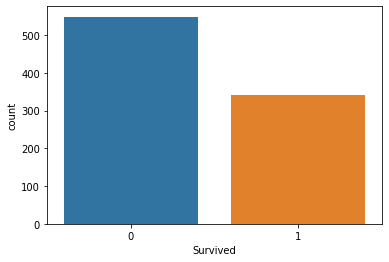

In [83]:
# Survived(범주형)
sns.countplot(x="Survived",data=df_train_final)

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


(array([ 62., 102., 397., 167.,  89.,  48.,  19.,   6.,   1.,   0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

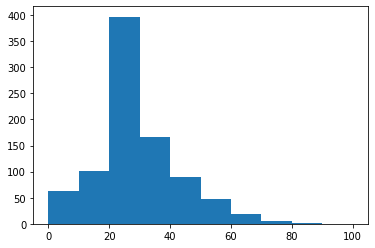

In [84]:
# Age(연속형)
print(df_train_final["Age"].describe())
plt.hist(df_train_final["Age"],range=[0,100])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

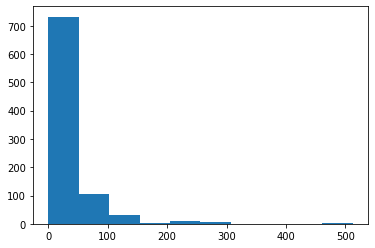

In [85]:
# Fare(연속형)
print(df_train_final["Fare"].describe())
plt.hist(df_train_final["Fare"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


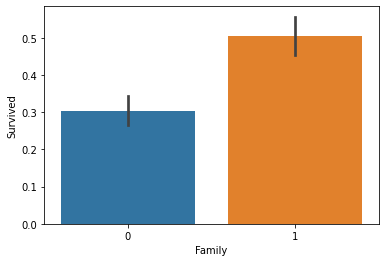

In [91]:
# Family(범주형)
sns.barplot('Family','Survived',data=df_train_final)

동반 가족이 있는 사람들의 생존률이 더 높았다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


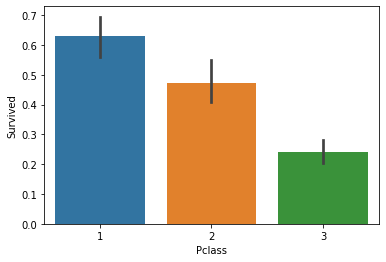

In [88]:
# Pclass(범주형)
sns.barplot('Pclass','Survived',data=df_train)

등급이 높은 객실일수록 생존률이 높았던 것을 확인할 수 있다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


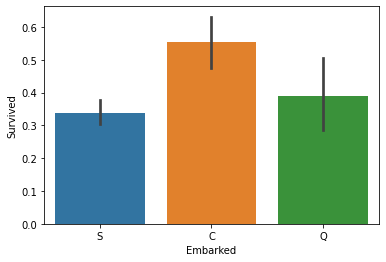

In [89]:
# Embarked(범주형)
sns.barplot('Embarked','Survived',data=df_train)

생존률이 높은 순서대로 Cherbourg, Queenstown, Southampton이다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


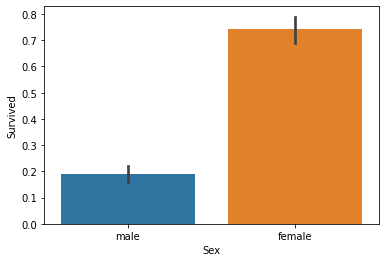

In [90]:
# Sex(범주형)
sns.barplot('Sex','Survived',data=df_train)

여성 생존률이 남성보다 앞도적으로 높다

###상관관계 분석

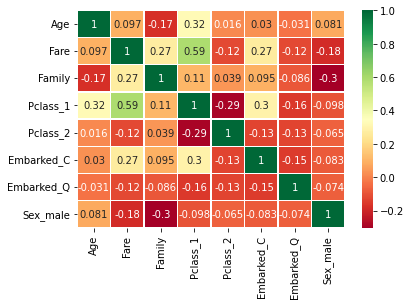

In [97]:
sns.heatmap(df_train_final.drop(["Survived"],axis=1).corr(), annot=True, linewidths=0.5, cmap="RdYlGn")

다중공산성 여부를 파악하기 위해 독립변수들간의 scatterplot을 확인해본다. \
다른 곳은 문제가 없지만, Fare와 Pclass1 사이의 상관계수가 조금 높은 것을 확인할 수 있다. \
아마 요금을 많이낼수록 당연히 더 높은 등급의 객실을 배정받았을 것이다. \
따라서 Fare 변수도 모델링 시 결과 왜곡을 불러일으킬 수 있으므로 삭제해준다.

In [98]:
df_train_final.drop(["Fare"],axis=1,inplace=True)
df_train_final.head(10)

,Survived,Age,Family,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,0,22.0,1,0,0,0,0,1
1,1,38.0,1,1,0,1,0,0
2,1,26.0,0,0,0,0,0,0
3,1,35.0,1,1,0,0,0,0
4,0,35.0,0,0,0,0,0,1
5,0,28.0,0,0,0,0,1,1
6,0,54.0,0,1,0,0,0,1
7,0,2.0,1,0,0,0,0,1
8,1,27.0,1,0,0,0,0,0
9,1,14.0,1,0,1,1,0,0


##5. Logistic Regression 모델 Train

### 문제 14. Regression 모델 종류에 대해 검색해보고 하나 선택하기

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor()
model_reg.fit(X_train,y_train)

RandomForestRegressor()

### 문제 15. 선택한 모델 구현 및 데이터 학습 시키기

In [ ]:
print(model_reg.score(X_train, y_train))

print(model_reg.score(X_test, y_test))

0.8985107282286043
0.53941606727736


### 문제 16. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Predict를 수행하고 mean_absolute_error, mse 결과 출력하기
pred = model_reg.predict(X_test)

# MAE
mae = mean_absolute_error(pred,y_test)
print("Mean absolute error:" + str(mae))

# MSE
mse = mean_squared_error(pred,y_test)
print("Mean squared error:"+str(mse))

Mean absolute error:34.54106465707212
Mean squared error:2398.003922496796


## Step 6. 초기 모델을 발전시키며 모델 수정


### 문제 17. 실제 값과 추측 값의 Scatter plot 시각화하기


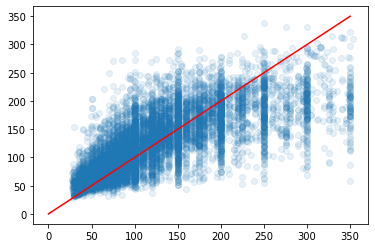

In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# 예시 코드를 드리겠습니다.
# 학습 이후 이런식으로 모델의 결과를 살펴보는구나... 정도의 큰 흐름을 중심으로 이해해주세요

plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')

### 문제 18. 에러 값의 히스토그램 확인하기


In [ ]:
# 예시코드를 제공하겠습니다.
# 위와 마찬가지로 큰흐름을 이해하는걸 목적으로 해주세요.
# 지금 단계에서 세부 함수나 코드를 모른다고해서 스트레스 받으실 필요 전혀 없습니다.

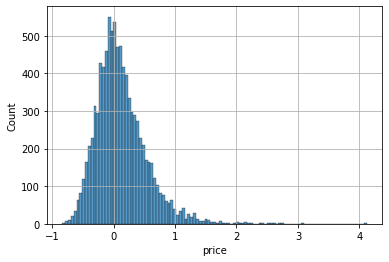

In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()

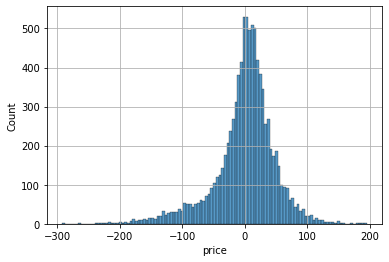

In [ ]:
# err의 히스토그램으로 에러 히스토그램 확인하기
err = pred - y_test
sns.histplot(err)
plt.grid()